In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
datos = pd.read_csv('train.csv')

In [3]:
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Cuantos Tweets tienen Palabras Claves?

[7552, 61]


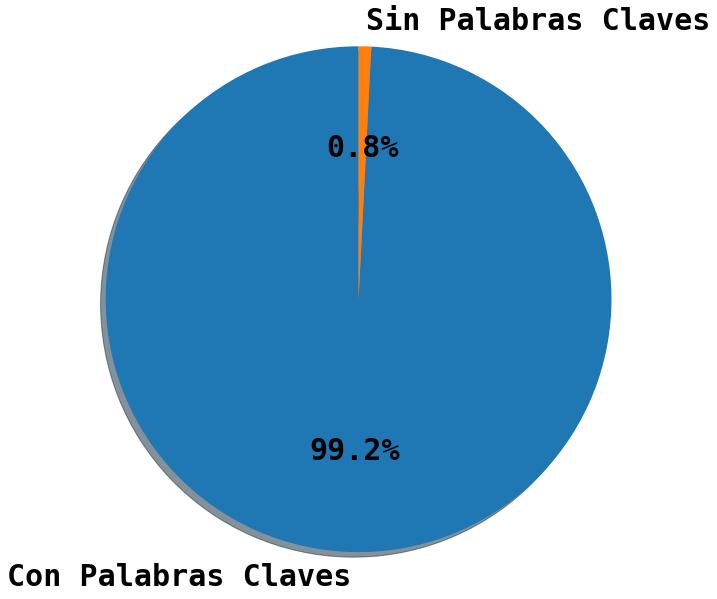

In [61]:
keyword_veracity = datos[(pd.notnull(datos['keyword']))]
nkeyword_veracity = datos[(pd.isnull(datos['keyword']))]
sizes = [keyword_veracity['id'].count(), 
         nkeyword_veracity['id'].count()]
print(sizes)
labels = ["Con Palabras Claves", "Sin Palabras Claves"]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops ={"size":30} )
ax1.axis('equal');

# Es más Probable un Desastre en un tweet con o sin Palabras Claves?

[0.4296597924602653, 0.4275688559322034, 0.6885245901639344]


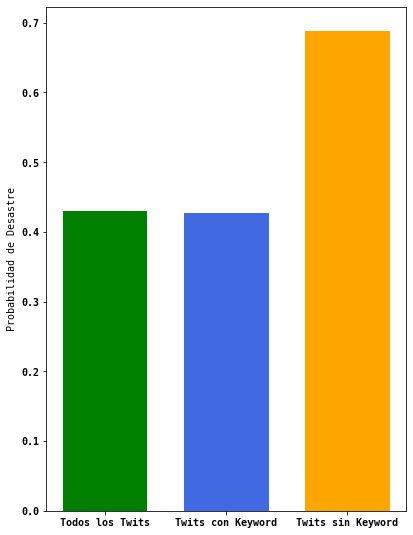

In [62]:

keyword_veracity = datos[(pd.notnull(datos['keyword']))]
nkeyword_veracity = datos[(pd.isnull(datos['keyword']))]

series = [datos['target'].mean(), keyword_veracity['target'].mean(), nkeyword_veracity['target'].mean()]
print(series)
series_label = ['Todos los Tweets', 'Tweets con Keyword', 'Tweets sin Keyword']

fig = plt.figure(figsize=[5,7])
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Promedio de Desastre')
ax.bar(series_label, series, color=['Green','royalblue', 'orange'], label='Promedio de Desastre', width=0.7)
plt.show()

# Cuales son las Palabras Claves que tienen mas y menos Desastres en Promedio?

In [65]:
keyword_veracity = pd.DataFrame(datos[(pd.notnull(datos['keyword']))])
def limpiar_keyword(x):
  x=re.sub(r"%20"," ", x)
  return x
keyword_veracity['keyword'] = keyword_veracity['keyword'].apply(limpiar_keyword)
kw_gb = keyword_veracity.groupby('keyword')

Kewords Menos Veraces


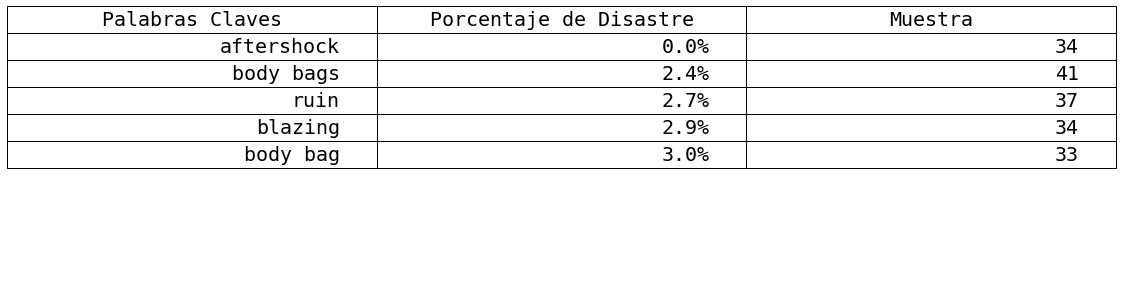

In [87]:
mean_kw = kw_gb['target'].mean()
count_kw = kw_gb['id'].count()

kw_df = pd.concat([mean_kw, count_kw], axis=1).reset_index()
kw_df.sort_values('target', inplace=True, ascending=True)

kw_df['target'] = kw_df['target'].apply(lambda x : '%.1f'%(x * 100) + '%')

fig, ax = plt.subplots(figsize=[8, 2])
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
labels = ['Palabras Claves', 'Porcentaje de Disastre', 'Muestra']
tablita = plt.table(cellText=kw_df.head(5).values, colLabels=labels, loc='top')
tablita.scale(2,2)
for cell in tablita.get_celld().values():
    cell.set_text_props(fontweight='ultralight', fontsize=20)
tablita.stale = True
tablita.auto_set_font_size(False)
fig.tight_layout()
print('Kewords Menos Veraces')
plt.show()

Kewords Mas Veraces


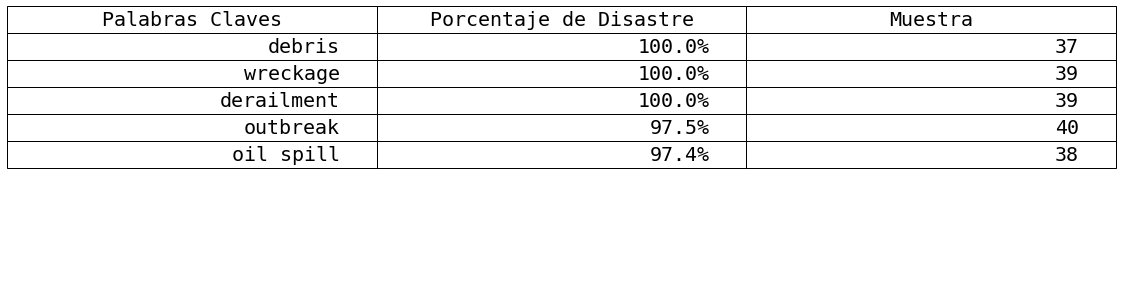

In [88]:
mean_kw = kw_gb['target'].mean()
count_kw = kw_gb['id'].count()

kw_df = pd.concat([mean_kw, count_kw], axis=1).reset_index()
kw_df.sort_values('target', inplace=True, ascending=False)

kw_df['target'] = kw_df['target'].apply(lambda x : '%.1f'%(x * 100) + '%')

fig, ax = plt.subplots(figsize=[8, 2])
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
labels = ['Palabras Claves', 'Porcentaje de Disastre', 'Muestra']
tablita = plt.table(cellText=kw_df.head(5).values, colLabels=labels, loc='top')
tablita.scale(2,2)
for cell in tablita.get_celld().values():
    cell.set_text_props(fontweight='ultralight', fontsize=20)
tablita.stale = True
fig.tight_layout()
print('Kewords Mas Veraces')
plt.show()